# Mine

In [5]:
import re
import itertools

"lambda Y, U, E, O, M: Y and M and (1*U+10*O+100*Y) == (1*E+10*M)**2"

def compile_formula(formula):
    
    par = set(re.findall(r"[A-Z]" ,formula))                          # set(YUEOM)
    
    front = ", ".join(par)                                            # Y, U, E, O, M
    
    var = re.split(r"([A-Z]+)", formula)                              # ['', 'YOU', ' == ', 'ME', '**2']
    
    check = [i[0] for i in var if i.isupper() and len(i) >= 2]        #[Y, M]
    
    check_1 = [c + " and " for c in check]                            # ["Y and ", "M and"]
    
    check_2 = "".join(check_1)                                        # Y and M and 
    
    form = [compile_word(ele) for ele in var]                         #['', '(1*U+10*O+100*Y)', ' == ', '(1*E+10*M)', '**2']

    form_1 = "".join(form)                                            #(1*U+10*O+100*Y) == (1*E+10*M)**2

    fin = "lambda " + str(front) + ": " + str(check_2) + str(form_1)  # "lambda Y, U, E, O, M: Y and M and (1*U+10*O+100*Y) == (1*E+10*M)**2"

    return eval(fin), par
      
def compile_word(text):
    
    if text.isupper():
    
        tem = ["%s*%s" % (10**i, letter) for i, letter in enumerate(text[::-1])]
        
        return "(" + "+".join(tem) + ")"
        
    else:
        
        return text
    
def faster_solve(formula):
    
    f, letters = compile_formula(formula)
    
    numbers = itertools.permutations([0,1,2,3,4,5,6,7,8,9], len(letters))
    
    for num in numbers:
        
        try:
            
            if f(*num):
            
                table = str.maketrans("".join(letters), "".join(map(str,num)))
            
                return formula.translate(table)
        
        except ArithmeticError:
            
            pass                           

print (faster_solve('A + B == BA')) 
print (faster_solve('YOU == ME**2'))
print (faster_solve('X / X == X'))


None
289 == 17**2
1 / 1 == 1


# Instructor

In [4]:
import re
import itertools
import string

"""Compile formula into a function. Also return letters found, as a str, in same order as parms of function. The first digit of 
   a multi-digit number can't be 0. So if YOU is a word in the formula, and the function is called with Y eqal to 0, the 
   function should return False."""

def compile_formula(formula):                                             # Ex: forula = "YOU == ME**2"

    letters = ''.join(set(re.findall('[A-Z]', formula)))                  # "YUEOM"                                   
    
    parms = ', '.join(letters)                                            # "Y, U, E, O, M"
    
    tokens = re.split('([A-Z]+)', formula)                                # ['', 'YOU', ' == ', 'ME', '**2']
    
    compiled_tokens = map(compile_word, tokens)                           # list(map(compile_word, tokens)) == ['', '(1*U+10*O+100*Y)', ' == ', '(1*E+10*M)', '**2']

    first_vars = [t[0] for t in tokens if len(t)>=2 and t.isupper()]      # ['Y', 'M']

    first_vars_conds = [c + " and " for c in first_vars]                    #驗證第一位數字不能為0 => 不可以是01 or 023

    body = ''.join(first_vars_conds) + ''.join(compiled_tokens)             # "Y and M and (1*U+10*O+100*Y) == (1*E+10*M)**2"
    
    f = 'lambda %s: %s' % (parms, body)                                   # "lambda Y, U, E, O, M: Y and M and (1*U+10*O+100*Y) == (1*E+10*M)**2"

    return eval(f), letters                                       

def compile_word(word):
    """Compile a word of uppercase letters as numeric digits. E.g., compile_word('YOU') => '(1*U+10*O+100*Y)'
    Non-uppercase words uncahanged: compile_word('+') => '+'"""

    if word.isupper():                                                         #只找大寫字母
        
        terms = [('%s*%s' % (10**i, d)) for (i, d) in enumerate(word[::-1])]   #對每個字母加上 "數字" 和 "*"
        
        return "(" + "+".join(terms) + ")"                                     # combine
    
    else:                                                                      #非大寫字母，直接return
        
        return word

def faster_solve(formula):
    """Given a formula like 'ODD + ODD == EVEN', fill in digits to solve it. Input formula is a string; output is a 
    digit-filled-in string or None. This version precompiles the formula; only one eval per formula."""
    
    f, letters = compile_formula(formula)                                        # f經過eval(f)後，已經是function
    
    for digits in itertools.permutations((1,2,3,4,5,6,7,8,9,0), len(letters)):   #以letters的長度，列出所有的digits => digits是numbers的tuple
                                                                                 # Ex: (2,3,1)
        
        try:
            
            if f(*digits) is True:                                               #將digits依序代入 f => 看是否valid
                
                table = str.maketrans(letters, ''.join(map(str, digits)))        #如果找到valid的digits => 把letters置換成digits的string
                                                                                 # str.maketrans()的str是syntax
                
                return formula.translate(table)                                  # return "841 == 29**2"
            
        except ArithmeticError:                                                  #如在將digits依序代入 f時，碰到ArithmeticError => 直接pass
                                                                                 # Ex: 0/0
            pass

print (faster_solve('A + B == BA'))                                              # None => should NOT return '1 + 0 == 01'
print (faster_solve('YOU == ME**2'))
print (faster_solve('X / X == X'))


None
289 == 17**2
1 / 1 == 1


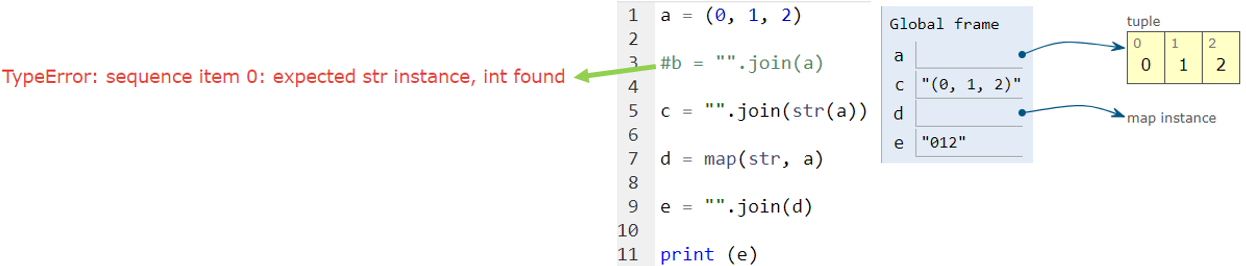

In [2]:
from IPython.display import Image

Image(r"Desktop\Number_tuple.png")

# (1) tuple of numbers不能直接用 "".join() 合併 => 因為 join() 預期內容物是string，不是numbers，Ex: b
# (2) "".join(str(a)) => "(0,1,2)" => 沒有合併到，只是把整組tuple變成string，Ex: c
# (3) 所以要先用 map() 把a的所有elements轉成strings，再用 "".join() 合併 => "012"，Ex: d & e